# Stock Market Prediction And Forecasting Using Stacked LSTM

<B><I>Libraries</B></I>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error
import math

In [2]:
data = pd.read_csv('NSE-TATAGLOBAL.csv')

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28/09/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27/09/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26/09/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25/09/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24/09/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


<B><I>The Closing Rate Matters, so we will check the graph of Rate</B></I>

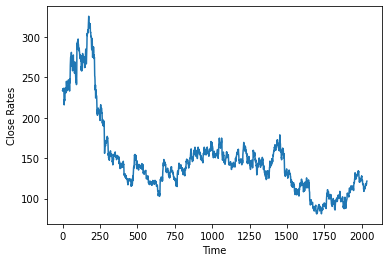

In [5]:
data2 = data.reset_index()['Close']
plt.xlabel('Time')
plt.ylabel('Close Rates')
plt.plot(data2)

<B><I>Changing the Rates between 0 & 1 and reversing the data</B></I>

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
data2 = scaler.fit_transform(np.array(data2).reshape(-1,1))

In [7]:
data2

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [18]:
def ds_dividing(ds, train_split=0.65):
    
    ds_size = len(ds)
    
    train_size = int(train_split * ds_size)
    
    train_ds = ds[:train_size]
    
    test_ds = ds[train_size:]
    
    return train_ds, test_ds

In [19]:
train_ds, test_ds = ds_dividing(data2)

In [21]:
len(data2) == len(train_ds)+len(test_ds)

True

In [23]:
len(train_ds),len(test_ds)

(1322, 713)

In [32]:
def XY(ds, time_step=100):
    A, B = [], []
    for x in range(len(ds) - time_step - 1):
        a = ds[x:(x+time_step), 0]
        A.append(a)
        B.append(ds[x + time_step, 0])
        
    return np.array(A), np.array(B)

In [33]:
x_train, y_train = XY(train_ds)

In [35]:
x_train.shape

(1221, 100)

In [36]:
 y_train.shape

(1221,)

In [37]:
x_test, y_test = XY(test_ds)

In [38]:
x_test.shape

(612, 100)

In [39]:
y_test.shape

(612,)

In [40]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [65]:
model=Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(55,return_sequences=True))
model.add(LSTM(40))
model.add(Dense(1))

In [66]:
model.compile(loss='mean_squared_error',optimizer='RMSprop')

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100, 60)           14880     
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 55)           25520     
_________________________________________________________________
lstm_14 (LSTM)               (None, 40)                15360     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 41        
Total params: 55,801
Trainable params: 55,801
Non-trainable params: 0
_________________________________________________________________


In [68]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=60,batch_size=64,verbose=1)

Epoch 1/60
20/20 [==============================] - 9s 240ms/step - loss: 0.0170 - val_loss: 0.0018
Epoch 2/60
20/20 [==============================] - 4s 199ms/step - loss: 0.0053 - val_loss: 0.0012
Epoch 3/60
20/20 [==============================] - 4s 197ms/step - loss: 0.0042 - val_loss: 0.0018
Epoch 4/60
20/20 [==============================] - 4s 197ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 5/60
20/20 [==============================] - 4s 198ms/step - loss: 0.0042 - val_loss: 8.9060e-04
Epoch 6/60
20/20 [==============================] - 4s 196ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 7/60
20/20 [==============================] - 4s 197ms/step - loss: 0.0031 - val_loss: 8.4106e-04
Epoch 8/60
20/20 [==============================] - 4s 198ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 9/60
20/20 [==============================] - 4s 195ms/step - loss: 0.0024 - val_loss: 5.8678e-04
Epoch 10/60
20/20 [==============================] - 4s 196ms/step - loss: 0.0030 - val_

In [70]:
train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)

In [71]:
train_prediction = scaler.inverse_transform(train_prediction)
test_prediction = scaler.inverse_transform(test_prediction)

In [73]:
math.sqrt(mean_absolute_error(y_train,train_predict))

12.49682534205143

In [74]:
math.sqrt(mean_absolute_error(y_test,test_predict))

10.700866879701149

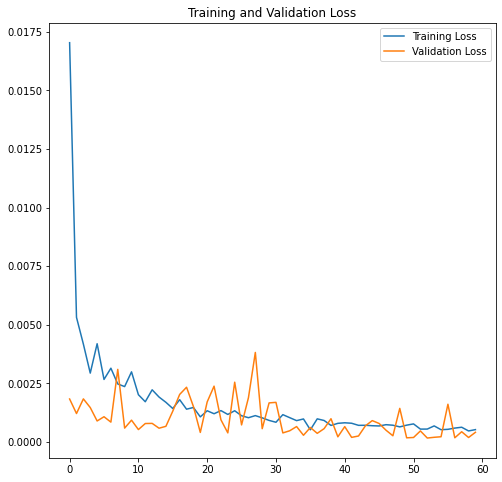

In [78]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8,8))
plt.plot(range(60), loss, label='Training Loss')
plt.plot(range(60), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()